<a href="https://colab.research.google.com/github/Groupac/Collab/blob/master/3%20%D0%98%D0%A1%20%D0%90%D1%87%D0%BC%D0%B8%D0%B7%D0%BE%D0%B2%20%D0%90%D0%BB%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AttributeError: ignored

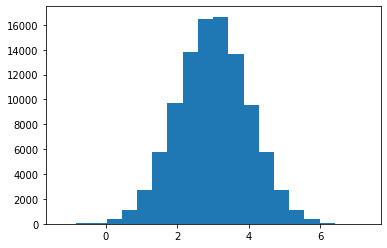

In [8]:
import matplotlib.pyplot as plt
import numpy as np

mu, sigma = 3, 1
s = np.random.normal(mu, sigma, 100000)

# Create the bins and histogram
count, bins, ignored = plt.hist(s, 20, normed=True)

# Plot the distribution curve
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu)**2 / (2 * sigma**2) ),  linewidth=3, color='y')
plt.show()